In [60]:
#importing basic useful libraries
import numpy as np
import pandas as pd
import re
# Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#NLP reletaed Librariesimport 

import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from textblob import TextBlob

In [5]:
#data reading from cvs
data=pd.read_csv('chennai_reviews.csv')

In [6]:
#showing 1st five row of the data set
data.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20,NaN,NaN,NaN,NaN
1,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,1,20,NaN,NaN,NaN,NaN
2,The Park Chennai,Will never do this,"Check in took more then 45 mins, all the 4 pil...",1,40,NaN,NaN,NaN,NaN
3,The Park Chennai,Experience not at par as claimed!!,"This property is a bit old. Bath tub, toilets ...",1,20,NaN,NaN,NaN,NaN
4,The Park Chennai,Not a good experience,The hotel rooms are quite old and are not main...,1,40,NaN,NaN,NaN,NaN


Exploratory Data Analysis

In [7]:
#Describe the shape (Rows,columns)
data.shape

(4768, 9)

In [8]:
#Describe the data type of every column values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 9 columns):
Hotel_name           4768 non-null object
Review_Title         4341 non-null object
Review_Text          4767 non-null object
Sentiment            4766 non-null object
Rating_Percentage    4767 non-null object
Unnamed: 5           64 non-null float64
Unnamed: 6           3 non-null object
Unnamed: 7           1 non-null float64
Unnamed: 8           1 non-null float64
dtypes: float64(3), object(6)
memory usage: 335.3+ KB


In [9]:
#Remove noisy dqata from column 6,7,8,9
#Remove the columns that have unnamed in the column name
data=data.loc[:,~data.columns.str.contains('^Unnamed')]
data.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20
1,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,1,20
2,The Park Chennai,Will never do this,"Check in took more then 45 mins, all the 4 pil...",1,40
3,The Park Chennai,Experience not at par as claimed!!,"This property is a bit old. Bath tub, toilets ...",1,20
4,The Park Chennai,Not a good experience,The hotel rooms are quite old and are not main...,1,40


In [10]:
#Replace empty cells with "Unvariable' in Review_tittle columns
values={'Hotel_name':'Unavailable','Review_Title':'Unavailable','Review_Text':'Unavailable'}
data=data.fillna(value=values)
data.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20
1,Accord Metropolitan,Unavailable,Worst hotel I have ever encountered. I will ne...,1,20
2,The Park Chennai,Will never do this,"Check in took more then 45 mins, all the 4 pil...",1,40
3,The Park Chennai,Experience not at par as claimed!!,"This property is a bit old. Bath tub, toilets ...",1,20
4,The Park Chennai,Not a good experience,The hotel rooms are quite old and are not main...,1,40


In [11]:
# replace noisy data in column Sentiment and Rating_Percentage with column mean value
data['Sentiment']=data['Sentiment'].str.replace(r'[^0-9]','')
data['Rating_Percentage']=data['Rating_Percentage'].str.replace(r'[^0-9]','')
#remove white spaces
data['Sentiment']=data['Sentiment'].str.replace(r'[s+]','')
#fill Misisng values 
data['Sentiment']=data['Sentiment'].fillna(2) # mean
data['Rating_Percentage']=data['Rating_Percentage'].fillna(72) # mean\
data.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20
1,Accord Metropolitan,Unavailable,Worst hotel I have ever encountered. I will ne...,1,20
2,The Park Chennai,Will never do this,"Check in took more then 45 mins, all the 4 pil...",1,40
3,The Park Chennai,Experience not at par as claimed!!,"This property is a bit old. Bath tub, toilets ...",1,20
4,The Park Chennai,Not a good experience,The hotel rooms are quite old and are not main...,1,40


Visualization Of Data Set

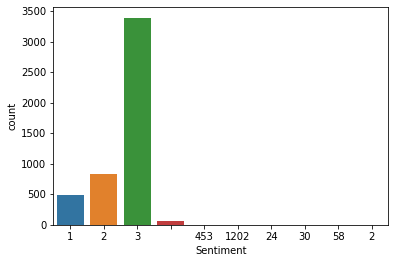

In [12]:
#Count plot for Sentiment values
sns.countplot(data['Sentiment'])

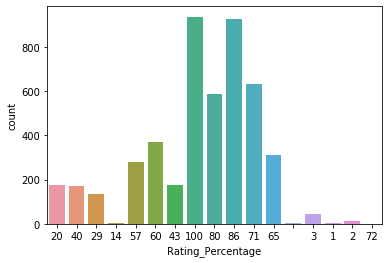

In [13]:
# Count plot for rating percentage 
sns.countplot(data['Rating_Percentage'])

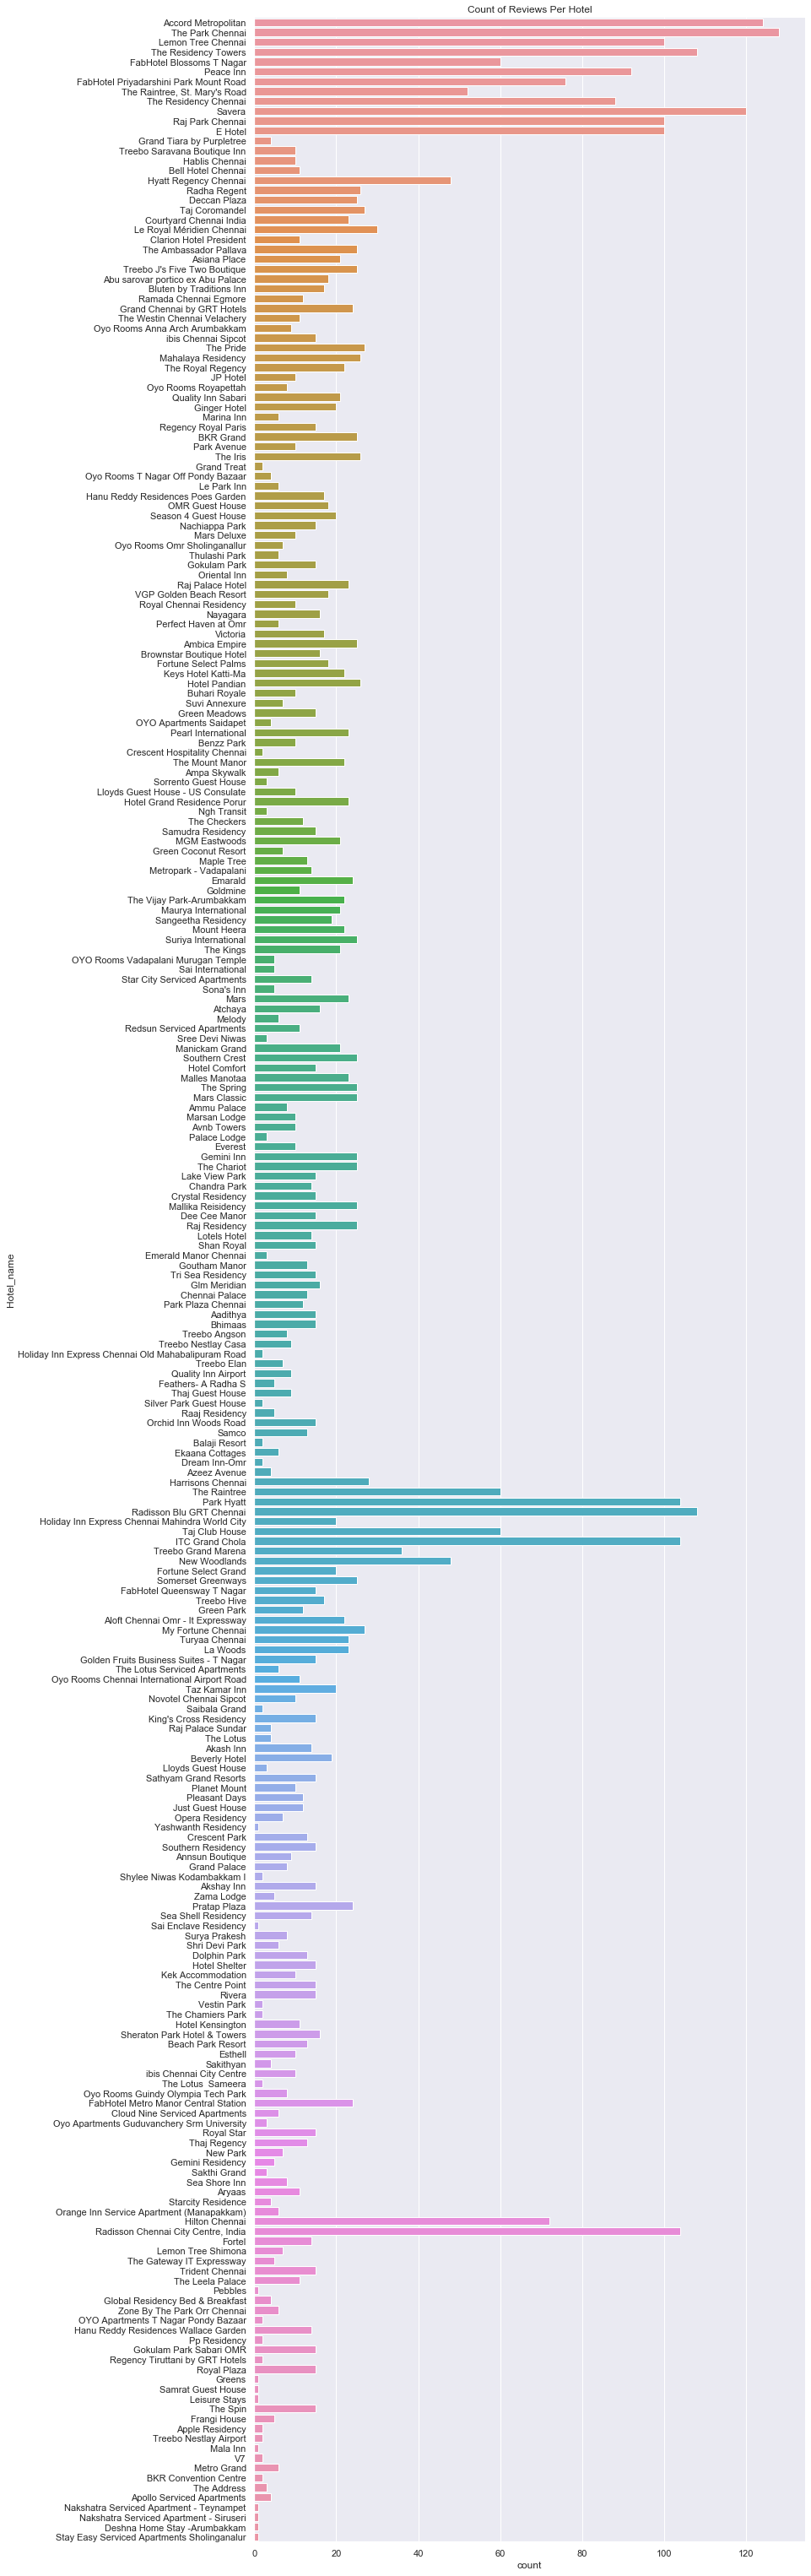

In [14]:
# Count plot for Hotel Name
sns.set(rc={'figure.figsize':(11.7,55)})
sns.countplot(y=data['Hotel_name'],data=data).set_title('Count of Reviews Per Hotel')
sns.despine()

NLP & Sentiment Analysis

In [57]:
#Sentiment Analysis of Review Title and Review Text
# Preprocessijng Value
#convert to Lower Case and cleaning dataset

In [17]:
#Convert to lower case
def preprocess(column_name):
    column_name = column_name.str.lower()
    column_name = column_name.str.replace(r"^[a-zA-Z]\s+","")
    column_name = column_name.str.replace(r"wouldn't","would not")
    column_name = column_name.str.replace(r"ain't","am not")
    column_name = column_name.str.replace(r"isn't","is not")
    column_name = column_name.str.replace(r"aren't","are not")
    column_name = column_name.str.replace(r"can't","can not")
    column_name = column_name.str.replace(r"shouldn't","should not")
    column_name = column_name.str.replace(r"shan't","shall not")
    column_name = column_name.str.replace(r"won't","will not")
    column_name = column_name.str.replace(r"hasn't","has not")
    column_name = column_name.str.replace(r"hadn't","had not")
    column_name = column_name.str.replace(r"don't","do not")
    column_name = column_name.str.replace(r"couldn't","could not")
    column_name = column_name.str.replace(r"didn't","did not")
    column_name = column_name.str.replace(r"aint","am not")
    column_name = column_name.str.replace(r"isnt","is not")
    column_name = column_name.str.replace(r"wouldnt","would not")
    column_name = column_name.str.replace(r"aint","am not")
    column_name = column_name.str.replace(r"isnt","is not")
    column_name = column_name.str.replace(r"arent","are not")
    column_name = column_name.str.replace(r"cant","can not")
    column_name = column_name.str.replace(r"shouldnt","should not")
    column_name = column_name.str.replace(r"shant","shall not")
    column_name = column_name.str.replace(r"wont","will not")
    column_name = column_name.str.replace(r"hasnt","has not")
    column_name = column_name.str.replace(r"hadnt","had not")
    column_name = column_name.str.replace(r"dont","do not")
    column_name = column_name.str.replace(r"couldnt","could not")
    column_name = column_name.str.replace(r"didnt","did not")
    column_name = column_name.str.replace(r"aint","am not")
    column_name = column_name.str.replace(r"isnt","is not")
    
    return column_name

In [19]:
data.Review_Title = preprocess(data.Review_Title)
data.Review_Text = preprocess(data.Review_Text)
data.head()


,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,not too comfortable,it seems that hotel does not check the basic a...,1,20
1,Accord Metropolitan,unavailable,worst hotel i have ever encountered. i will ne...,1,20
2,The Park Chennai,will never do this,"check in took more then 45 mins, all the 4 pil...",1,40
3,The Park Chennai,experience not at par as claimed!!,"this property is a bit old. bath tub, toilets ...",1,20
4,The Park Chennai,not a good experience,the hotel rooms are quite old and are not mam ...,1,40


###  Making function to Remove StopWords

In [20]:

def stopwords_removal(dfCol):
    
    dfCol = dfCol.astype(str)
    for j in range(dfCol.size):
        sentences = nltk.word_tokenize(dfCol[j])
        for i in range(len(sentences)):
            words = nltk.word_tokenize(sentences[i])
            newWords = [word for word in words if word not in stopwords.words('english')]
            sentences[i] = ' '.join(newWords)
        #dfCol[] 
    return dfCol

### Pass Hotel Name in Sentiment_Analysis function to get an over all review score

In [26]:
#TODO: create a fxn that takes all the params and gives an overall score
#Sentiment Analysis of Hotel

#This function will take a hotel name 
#and generate visualization based on Review Title, Review Text, Sentiment and Rating Percentage

def sentiment_analysis_fxn(hotel_name):
    
    if data[data.Hotel_name == hotel_name].empty:
        print("This hotel name does not exists !")
        
    else:
        #Analysis of Review_Title column
        review_title = data[data.Hotel_name == hotel_name].iloc[:,1].to_string()
        title_analysis = TextBlob(review_title)
        review_title_polarity = title_analysis.sentiment.polarity
        
        #Analysis Review_Text column
        review_text = data[data.Hotel_name == hotel_name].iloc[:,2].to_string()
        text_analysis = TextBlob(review_text)
        review_text_polarity = text_analysis.sentiment.polarity
         #Analysis of Sentiment column
        sentiment_sum_value = 0
        review_sentiment = data[data.Hotel_name == hotel_name].iloc[:,3].tolist()
        for i in range(len(review_sentiment)):
            sentiment_sum_value = sentiment_sum_value + int(review_sentiment[i])
        
        #Normalize sentiment_sum_value
        sentiment_sum_value /= len(review_sentiment)
        
        
        #Analysis of Rating Percentage
        rating_sum_value = 0
        review_rating = data[data.Hotel_name == hotel_name].iloc[:,4].tolist()
        for i in range(len(review_rating)):
            rating_sum_value = rating_sum_value + int(review_rating[i])
            
        #Normalize rating_sum_value
        rating_sum_value /= (len(review_rating) * 72)
        
        total_polarity = review_text_polarity + review_title_polarity + sentiment_sum_value + rating_sum_value
        
        print("Score for "+hotel_name.upper()+" out of 7 is: ", total_polarity)

In [31]:
sentiment_analysis_fxn('Accord Metropolitan')
sentiment_analysis_fxn('Somerset Greenways')
sentiment_analysis_fxn('Bell Hotel Chennai')
#x = data.Hotel_name
#x = x.unique()

#for names in range(len(x)):
 #   y = sentiment_analysis_fxn(x[names])

#print(y)

Score for ACCORD METROPOLITAN out of 7 is:  5.118899513568869
Score for SOMERSET GREENWAYS out of 7 is:  5.040722724987431
Score for BELL HOTEL CHENNAI out of 7 is:  4.216926221926222


### Making function for sentiment analysis

In [47]:
def sentiment_analysis_insights(hotel_name):
    print("** SENTIMENT ANALYSIS RESULT OF HOTEL:",hotel_name.upper()+" **\n\n")
    Neutral = 0
    Weak_Positive = 0
    Mild_Positive = 0
    Strong_Positive = 0
    Weak_Negative = 0
    Mild_Negative = 0
    Strong_Negative = 0

    if data[data.Hotel_name == hotel_name].empty:
        print("This hotel name does not exists !")
        
    else:
        review_title = data[data.Hotel_name == hotel_name].iloc[:,1]
        for values in review_title:
            title_analysis = TextBlob(values)
            review_title_polarity = title_analysis.sentiment.polarity
            
            if(review_title_polarity == 0 ):
                Neutral += 1
            elif(review_title_polarity > 0 and review_title_polarity < .3):
                Weak_Positive += 1
            
            elif(review_title_polarity >= .3  and review_title_polarity < .6):
                Mild_Positive += 1
        
            elif(review_title_polarity >= .6 and review_title_polarity <= 1 ):
                Strong_Positive += 1
              
            elif(review_title_polarity >= -.3 and review_title_polarity < 0):
                Weak_Negative += 1
        
            elif(review_title_polarity >= -.6 and review_title_polarity < -.3):
                Mild_Negative += 1
            elif(review_title_polarity >= .6 and review_title_polarity <= 1 ):
                Strong_Positive += 1
              
            elif(review_title_polarity >= -.3 and review_title_polarity < 0):
                Weak_Negative += 1
        
            elif(review_title_polarity >= -.6 and review_title_polarity < -.3):
                Mild_Negative += 1
        
            elif(review_title_polarity >= -1 and review_title_polarity < -.6):
                Strong_Negative += 1
        
        
        
          
        print('TOTAL NEUTRAL IS:' + str(Neutral))
        print('TOTAL WEAK POSITIVE IS:' + str(Weak_Positive))
        print('TOTAL MILDLY POSITIVE IS:' + str(Mild_Positive))
        print('TOTAL STRONGLY POSITIVE IS:' + str(Strong_Positive))
        print('TOTAL WEAKLY NEGATIVE IS:' + str(Weak_Negative))
        print('TOTAL MILDY NEGATIVE IS:' + str(Mild_Negative))
        print('TOTAL STRONGLY NEGATIVE IS:' + str(Strong_Negative))
        
        import matplotlib.pyplot as plt
#Visualization of result
        plt.figure(figsize=[6,6])
        labels = 'Weak Positive','Mild Positive','Strong Positive', 'Neutral', 'Weak Negative', 'Mild Negative', 'Strong Negative'
        sizes = [Weak_Positive, Mild_Positive, Strong_Positive, Neutral, Weak_Negative, Mild_Negative, Strong_Negative]
        colors = ['blue', 'yellow', 'green','white','grey','maroon','red']
        explode = (0.0,0.0,1.0,0.0,0.0,0.0,0.0)
        plt.pie(sizes,explode = explode, labels=labels, colors=colors, 
                autopct='%1.1f%%', shadow=True, startangle=140, radius = 90000)
        plt.axis('equal')
        plt.title('Visualization with 7 categories\n\n\n')
        plt.show()
        #Visualization of result
        plt.figure(figsize=[6,6])
        labels = 'Positive', 'Neutral', 'Negative'
        sizes = [Weak_Positive + Mild_Positive + Strong_Positive, Neutral, Weak_Negative + Mild_Negative + Strong_Negative]
        colors = ['blue', 'green','red']
              
        explode = (0.0,0.0,0.0)
        plt.pie(sizes,explode = explode, labels=labels, colors=colors, 
                autopct='%1.1f%%', shadow=True, startangle=140, radius = 90000)
        plt.axis('equal')
        plt.title('Visualization with 3 categories\n')
        plt.show()
        

### Test the Above function hotel names

** SENTIMENT ANALYSIS RESULT OF HOTEL: ACCORD METROPOLITAN **


TOTAL NEUTRAL IS:32
TOTAL WEAK POSITIVE IS:8
TOTAL MILDLY POSITIVE IS:12
TOTAL STRONGLY POSITIVE IS:68
TOTAL WEAKLY NEGATIVE IS:4
TOTAL MILDY NEGATIVE IS:0
TOTAL STRONGLY NEGATIVE IS:0


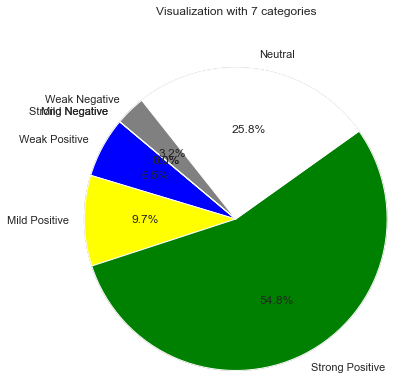

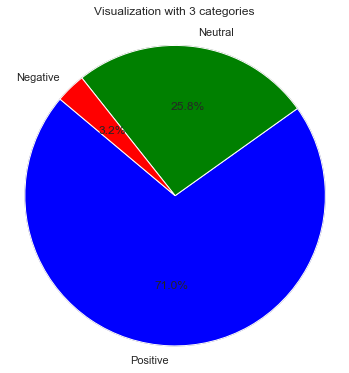

** SENTIMENT ANALYSIS RESULT OF HOTEL: THE RESIDENCY CHENNAI **


TOTAL NEUTRAL IS:28
TOTAL WEAK POSITIVE IS:0
TOTAL MILDLY POSITIVE IS:20
TOTAL STRONGLY POSITIVE IS:40
TOTAL WEAKLY NEGATIVE IS:0
TOTAL MILDY NEGATIVE IS:0
TOTAL STRONGLY NEGATIVE IS:0


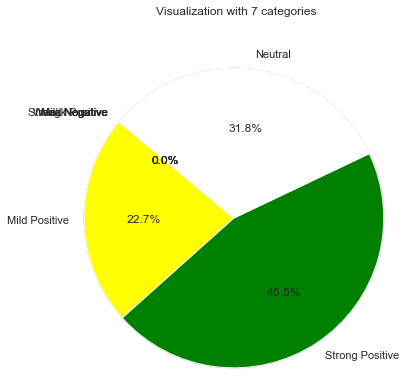

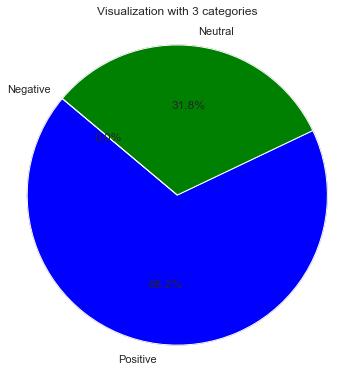

In [48]:
sentiment_analysis_insights('Accord Metropolitan')  
sentiment_analysis_insights('The Residency Chennai')  


### WordCloud Generation

In [53]:
#Generates a WordCLoud for visualization using the Review Text
def get_WordCloud(hotel_name):
    
    if data[data.Hotel_name == hotel_name].empty:
        print("This hotel name does not exists !")
        
    else:
        review_text = data[data.Hotel_name == hotel_name].iloc[:,2].to_string()
        
        wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(review_text)
        plt.figure(figsize=(10,10))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.title("WordCloud for "+hotel_name.upper())
        plt.show

### Pass Hotel In get Wordcloud() to get Wordcloud image

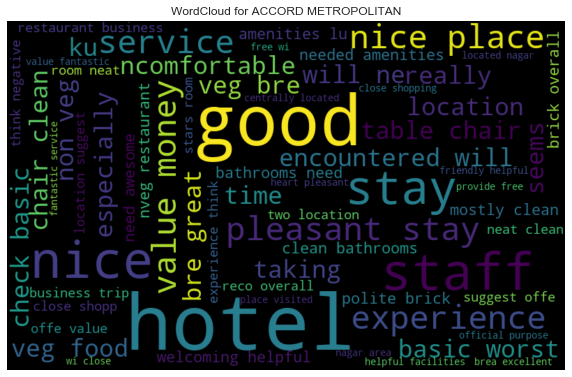

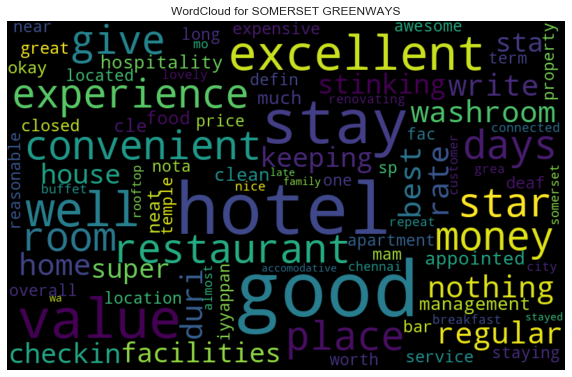

In [54]:
get_WordCloud('Accord Metropolitan')
get_WordCloud('Somerset Greenways')